In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataset

In [2]:
df = pd.read_csv("E:/BAN 675/Final Proj/amazon_alexa.tsv", sep = '\t')

In [3]:
df.shape

(3150, 5)

In [4]:
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


No null value, good

In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


### clean data set

In [7]:
import nltk
from nltk.corpus import stopwords 
import re
import matplotlib.pyplot as plt

remove stop words and pinctuation

In [8]:
stopwords = stopwords.words("english")

def clean(x):
    x = re.sub("[^\w\d]"," ",x)
    x = " ".join([y for y in x.split() if y not in stopwords])
    return x.lower()
df['text'] =  df['verified_reviews'].apply(clean)
df

,rating,date,variation,verified_reviews,feedback,text
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i lot fun thing my 4 yr old learns dinosaurs c...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kids adults everyone
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening music searching locations checking t...
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i love things running entire home tv lights th...
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i sound quality great i mostly ...


remove punctuation

### Visualization

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [10]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

Mostly pos

Text(0.5, 1.0, 'Number of reviews per ratings')

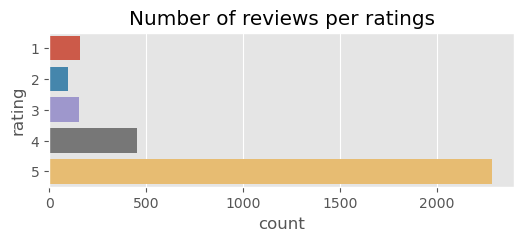

In [11]:
# Plot the count plot for the ratings
plt.figure(figsize=(6, 2))
sns.countplot( y= df['rating']) 
plt.title("Number of reviews per ratings")

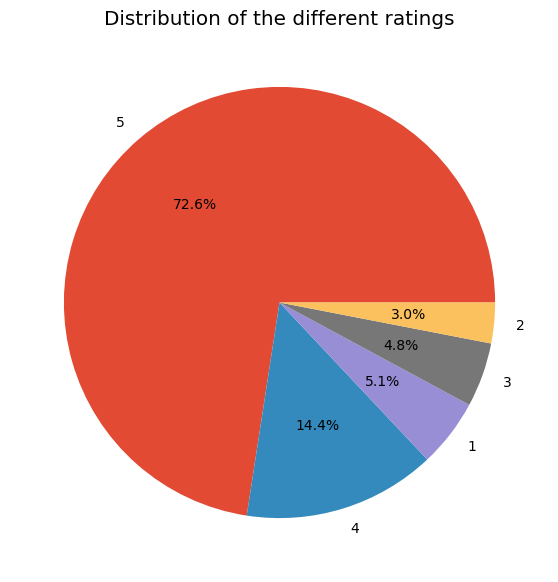

In [12]:
fig = plt.figure(figsize=(7,7))
tags = df['rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f%%', label='')
plt.title("Distribution of the different ratings")
plt.show()

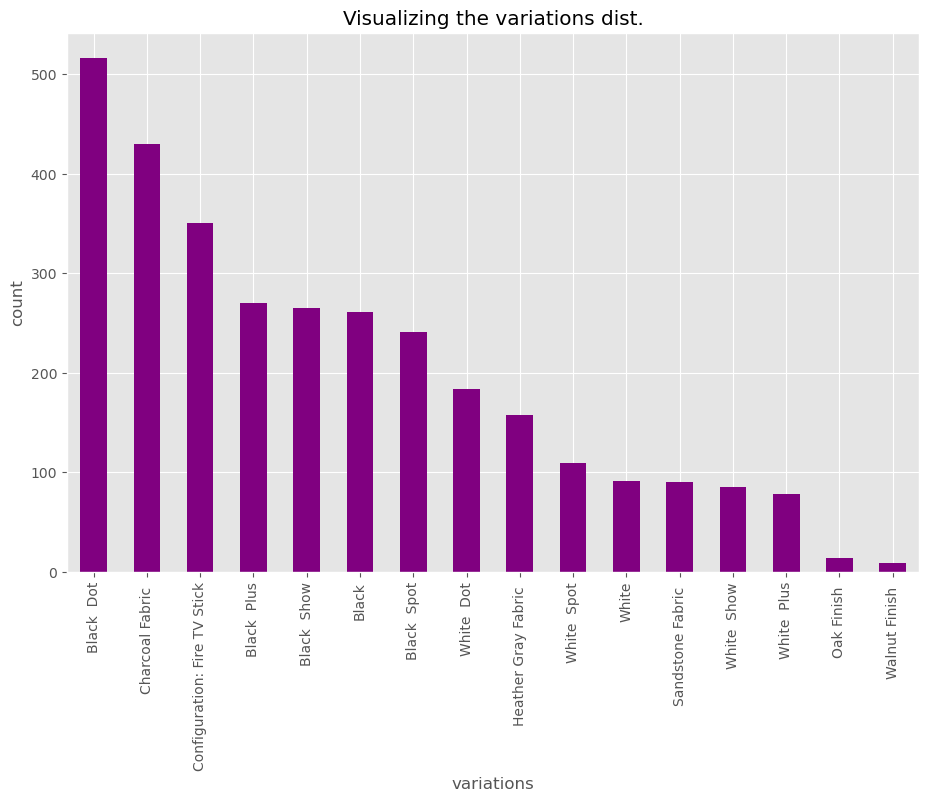

In [13]:
df['variation'].value_counts().plot.bar(color = 'purple', figsize = (11, 7))
plt.title('Visualizing the variations dist.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()
     

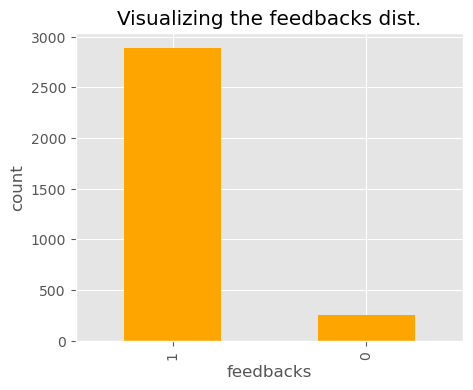

In [14]:
df['feedback'].value_counts().plot.bar(color = 'orange', figsize = (5, 4))
plt.title('Visualizing the feedbacks dist.')
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()
     

# Making Word Cloud

In [15]:
list_cat = df['feedback'].unique()
print(list_cat)
word_list_cat = []
for cat in list_cat:
    val = df[df['feedback'] == cat]
    sentences = val['verified_reviews'].tolist() 
    sentences_as_one_string =" ".join(sentences)
    word_list_cat.append(sentences_as_one_string)

print(len(word_list_cat))

[1 0]
2


Text(0.5, 1.0, 'Positive reviews')

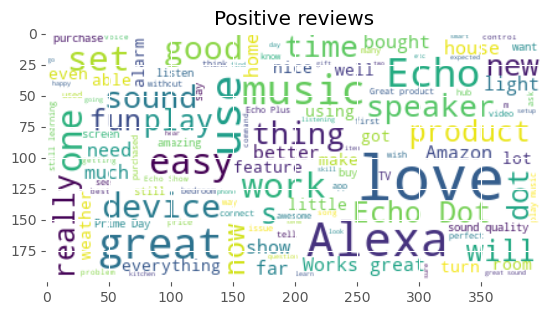

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",max_font_size=50,
                      max_words=120).generate(word_list_cat[0])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Positive reviews")

Text(0.5, 1.0, 'Negative reviews')

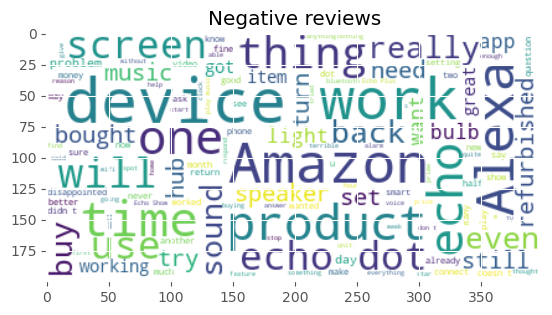

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",max_font_size=50,
                      max_words=120).generate(word_list_cat[1])
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Negative reviews")

# Analysis

## Sentiment Analysis

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["verified_reviews"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["verified_reviews"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["verified_reviews"]]
print(df.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

                                                text  Positive  Negative  \
0                                          love echo     0.692     0.000   
1                                              loved     0.807     0.000   
2  sometimes playing game answer question correct...     0.114     0.102   
3  i lot fun thing my 4 yr old learns dinosaur

In [19]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


In [20]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  1035.4579999999983
Negative:  96.79999999999995
Neutral:  1936.740999999996


In [21]:
df

,rating,date,variation,verified_reviews,feedback,text,Positive,Negative,Neutral
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,0.692,0.000,0.308
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,0.807,0.000,0.193
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,0.114,0.102,0.784
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i lot fun thing my 4 yr old learns dinosaurs c...,0.383,0.000,0.617
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,0.000,0.000,1.000
...,...,...,...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,perfect kids adults everyone,0.380,0.000,0.620
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,listening music searching locations checking t...,0.000,0.000,1.000
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,i love things running entire home tv lights th...,0.237,0.028,0.735
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,only complaint i sound quality great i mostly ...,0.087,0.087,0.827


### CountVectorizer

In [22]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


In [23]:
# vectorize
count_vectorizer = CountVectorizer(lowercase=True,ngram_range = (1,1))

count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

In [24]:
# Partition data into training and testing set
feature_train, feature_test, target_train, target_test = train_test_split(count_vectors, df['feedback'],
                                                                        test_size=0.3, random_state=1)

In [25]:
# Create logistic regression model object
logreg = LogisticRegression(solver='lbfgs')
# fit the model with data
logreg.fit(feature_train,target_train)
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In [26]:
# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy: ", accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision: ", precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall: ", recall_score(target_test,predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score: ", f1_score(target_test,predictions))

Logistic Regression Model Accuracy:  0.9502645502645503
Logistic Regression Model Precision:  0.9588431590656284
Logistic Regression Model Recall:  0.9885321100917431
Logistic Regression Model F1-Score:  0.9734613212874083


### TFIDF

In [27]:
# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,ngram_range = (1,1))
# Fit and transform the dataset
text_tfidf = tfidf.fit_transform(df['verified_reviews'])

In [28]:
# Partition data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(text_tfidf, df['feedback'],
                                                                        test_size=0.3, random_state=1)

In [29]:
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
# fit the model with data
logreg.fit(X_train,y_train)
# Forecast the target variable for given test dataset
predictions = logreg.predict(X_test)

In [30]:
# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(y_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(y_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(y_test,predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(y_test,predictions))

Logistic Regression Model Accuracy: 0.9238095238095239
Logistic Regression Model Precision: 0.923728813559322
Logistic Regression Model Recall: 1.0
Logistic Regression Model F1-Score: 0.960352422907489


Random Forest

Training Accuracy : 0.9913832199546485
Testing Accuracy : 0.9396825396825397
[[ 16  57]
 [  0 872]]


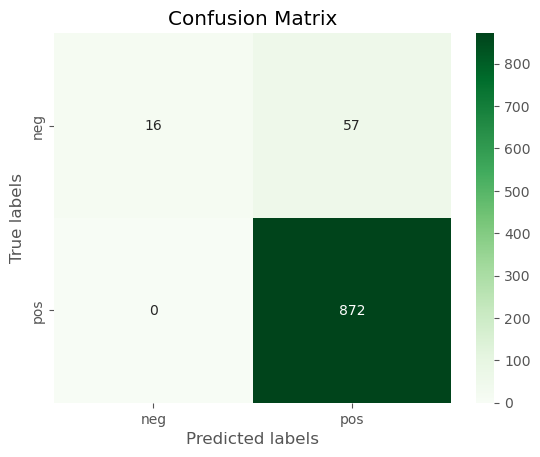

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['neg', 'pos']); ax.yaxis.set_ticklabels(['neg', 'pos']);

Prediction

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
labels = df.rating
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, text_tfidf, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
        model.fit(text_tfidf, labels)
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

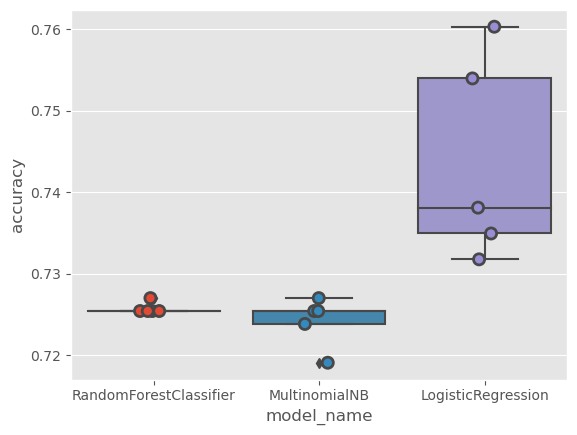

model_name
LogisticRegression        0.743810
MultinomialNB             0.724127
RandomForestClassifier    0.725714
Name: accuracy, dtype: float64


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())


In [39]:
texts = ["Not good",]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format([predicted]))

"Not good"
  - Predicted as: '[4]'
